In [142]:
from PIL import Image
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

im_frame = Image.open('/content/free-images.jpg')
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8) # 'Your_2D_np_array'

In [143]:
i1 = image[150:500,400:750]

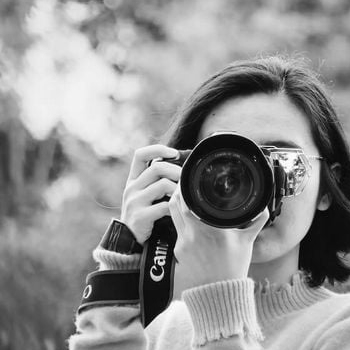

In [144]:
from google.colab.patches import cv2_imshow
cv2_imshow(i1)

In [145]:
distances = [50] # Offset
angles = [np.pi/2]  # Vertical Direction
glcm = graycomatrix(i1, distances=distances, angles=angles,levels=256)

In [146]:
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')

**Manual Calculations**

In [147]:
x = [
    [1,2,1],
    [2,0,2],
    [1,2,3]
]
f = [
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
]
for i in range(0,3):
  for j in range(0,2):
    f[x[i][j]][x[i][j+1]]+=1
print(*f)

[0, 0, 1, 0] [0, 0, 2, 0] [1, 1, 0, 1] [0, 0, 0, 0]


In [148]:
class Probability_matrix:
  def __init__(self,img1):
    self.i1 = img1
    self.l = len(i1)
    self.r = len(i1[0])-1
    self.arr = [[0 for i in range(256)] for i in range(256)]
    self.sym_glcm = [[0 for i in range(256)] for i in range(256)]

  def Pro_Matrix(self):
    #GLCM
    for i in range(0,self.l):
      for j in range(0,self.r-1):
        self.arr[self.i1[i][j]][self.i1[i][j+1]]+= 1

    #Symmetric
    for i in range(256):
      for j in range(256):
        self.sym_glcm[j][i] = self.arr[i][j]

    #Probability
    prob = self.sym_glcm+self.arr

    #Summation of Elements
    sum=0
    for i in range(256):
      for j in range(256):
        sum+=prob[i][j]

    #Normalize
    for i in range(256):
      for j in range(256):
        prob[i][j]/=sum
    return prob

In [149]:
sol = Probability_matrix(i1)

prob_matrix = sol.Pro_Matrix()

In [150]:
from math import log,pow

In [151]:
class Features:
  def __init__(self,prob):
    self.p = prob

  def contrast(self):
    cont = 0
    for i in range(256):
      for i in range(256):
        if(i==j): continue
        else:
          cont+=((i-j)**2)*self.p[i][j]
    return cont

  def entropy(self):
    ent = 0
    for i in range(256):
      for j in range(256):
        if(self.p[i][j]!=0):
          ent+=self.p[i][j]*log(self.p[i][j],2)
    return ent

  def homogeneity(self):
    homo = 0
    for i in range(256):
      for i in range(256):
        if(i==j): continue
        else:
          homo+=self.p[i][j]/(1+pow(i-j,2))
    return homo
  def energy(self):
    ene = 0
    for i in range(256):
      for i in range(256):
        ene+=pow(self.p[i][j],2)
    return ene

In [152]:
feature = Features(prob_matrix)

print("Contrast = {:.5f}".format(feature.contrast()))
print("Entropy = {:.5f}".format(feature.entropy()))
print("Energy = {:.5f}".format(feature.energy()))
print("Homogeneity = {:.5f}".format(feature.homogeneity()))

Contrast = 96.86384
Entropy = -12.19384
Energy = 0.00000
Homogeneity = 0.00049
